# The Sound of Science:How Spotify Listens Back Using Data!!!

## 1. Introduction
Spotify, one of the largest music streaming platforms globally, leverages data science to deliver personalized music recommendations, analyze user behavior, and optimize its marketing strategies. This case study explores the application of machine learning, data visualization, and user segmentation in Spotify using a real-world dataset. We aim to understand how Spotify "listens back" using advanced analytics to enhance user experience and business growth.

### Load the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("spotify_top_music.csv", index_col=0)

In [7]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [11]:
df.describe().shape


(8, 11)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,603.0,2014.592040,2.607057,2010.0,2013.0,2015.0,2017.0,2019.0
bpm,603.0,118.545605,24.795358,0.0,100.0,120.0,129.0,206.0
nrgy,603.0,70.504146,16.310664,0.0,61.0,74.0,82.0,98.0
dnce,603.0,64.379768,13.378718,0.0,57.0,66.0,73.0,97.0
dB,603.0,-5.578773,2.798020,-60.0,-6.0,-5.0,-4.0,-2.0
live,603.0,17.774461,13.102543,0.0,9.0,12.0,24.0,74.0
val,603.0,52.225539,22.513020,0.0,35.0,52.0,69.0,98.0
dur,603.0,224.674959,34.130059,134.0,202.0,221.0,239.5,424.0
acous,603.0,14.326700,20.766165,0.0,2.0,6.0,17.0,99.0
spch,603.0,8.358209,7.483162,0.0,4.0,5.0,9.0,48.0


In [13]:
df.describe().transpose().shape

(11, 8)

In [14]:
df.rename(columns = {"top genre":"genre"}, inplace = True)

# Quick Insights

## Top 5 Songs

In [15]:
popular_songs = df.sort_values(by = "pop", ascending  = False)
popular_songs.head()

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,21,9,206,58,4,97
575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,96
576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,9,75,191,4,3,95
577,How Do You Sleep?,Sam Smith,pop,2019,111,68,48,-5,8,35,202,15,9,93


## Top 5 Artists

In [16]:
popular_artists = pd.DataFrame(df["artist"].value_counts().head()).rename(columns = {"artist":"Billboard Spots"})
popular_artists

,count
artist,
Katy Perry,17
Justin Bieber,16
Rihanna,15
Maroon 5,15
Lady Gaga,14


## Top 5 Genres

In [17]:
popular_genres = pd.DataFrame(df["genre"].value_counts().head().index).rename(columns = {0:"Genre"})
popular_genres.index += 1
popular_genres

,genre
1,dance pop
2,pop
3,canadian pop
4,barbadian pop
5,boy band


# How Song Characteristics are Changing Over the Years

## Data Preparation

In [18]:
time_series_df = df.set_index("year")
time_series_df.head()

,title,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,,,,
2010,"Hey, Soul Sister",Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
2010,Love The Way You Lie,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2010,TiK ToK,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
2010,Bad Romance,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
2010,Just the Way You Are,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78


In [20]:
time_series_df.drop(["artist", "title", "genre"], axis = 1, inplace = True)
time_series_df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,
2010,97,89,67,-4,8,80,217,19,4,83
2010,87,93,75,-5,52,64,263,24,23,82
2010,120,84,76,-3,29,71,200,10,14,80
2010,119,92,70,-4,8,71,295,0,4,79
2010,109,84,64,-5,9,43,221,2,4,78


# Variation of the Duration of Billboard Songs Over the Years

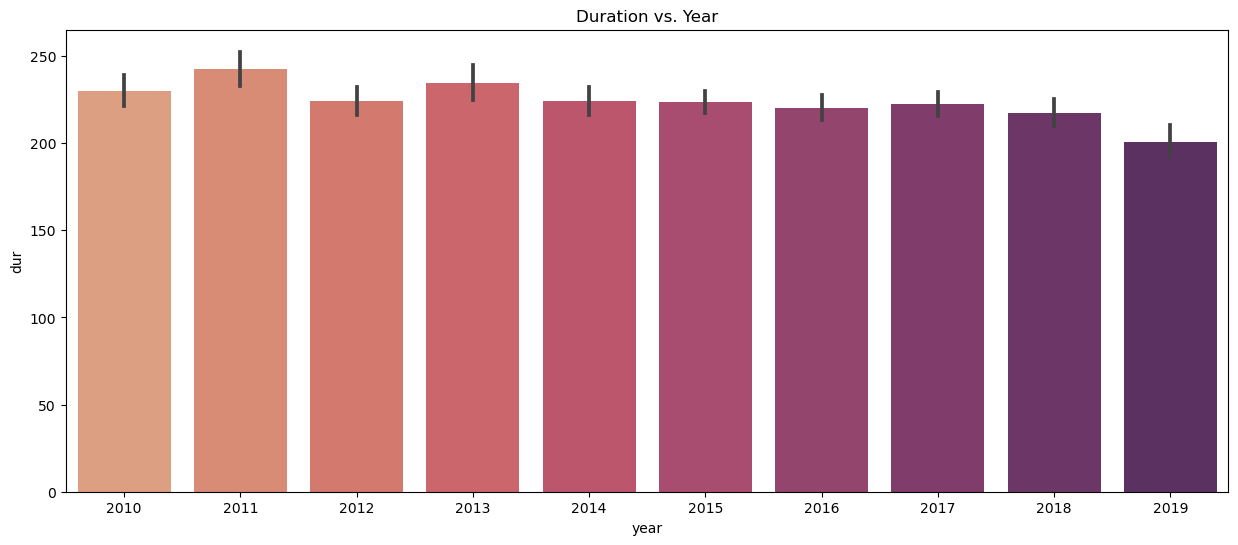

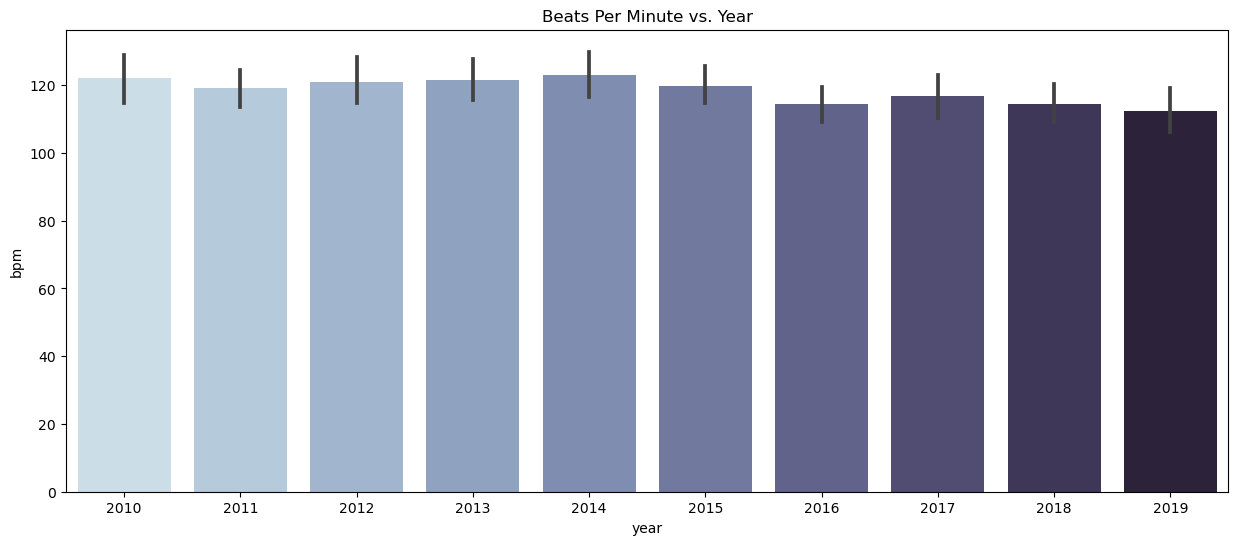

In [21]:
plt.figure(figsize = (15,6))
plot1 = sns.barplot(x = time_series_df.index, y = time_series_df["dur"], data = time_series_df, palette = "flare").set_title("Duration vs. Year")

plt.figure(figsize = (15,6))
plot2 = sns.barplot(x = time_series_df.index, y = time_series_df["bpm"], data = time_series_df, palette = "ch:s=.25,rot=-.25").set_title("Beats Per Minute vs. Year")

In [22]:
df[df["year"] >= 2018]

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
509,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,86
510,Havana (feat. Young Thug),Camila Cabello,dance pop,2018,105,52,77,-4,13,39,217,18,3,85
511,I Like It,Cardi B,pop,2018,136,73,82,-4,37,65,253,10,13,85
512,New Rules,Dua Lipa,dance pop,2018,116,70,76,-6,15,61,209,0,7,84
513,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2018,122,81,87,-4,8,97,199,38,6,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69



All Billboard Songs from 2018 and 2019 are Pop songs. Usually, pop songs do not have a long duration which explains the decrease in duration over the last couple of years.

Also, since all the songs are pop songs, the BPM is an average of 153 (as seen in the bar graph), with a high of 180 and a low of 97. This number of beats per minute is expected as pop songs don't usually go over 190-200 or below 80-90.

# Variation of the Speechiness of Billboard Songs Over the Years


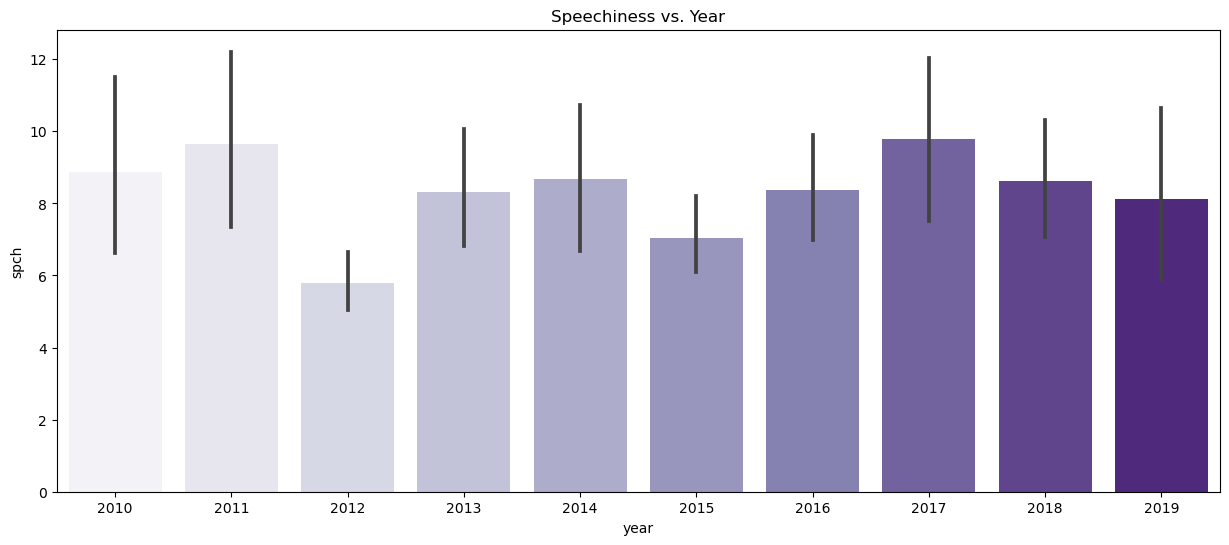

In [24]:
plt.figure(figsize = (15,6))
plot3 = sns.barplot(x = time_series_df.index, y = time_series_df["spch"], data = time_series_df, palette = "Purples").set_title("Speechiness vs. Year")

In [26]:
df[df["year"] == 2012]

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
105,Titanium (feat. Sia),David Guetta,dance pop,2012,126,79,60,-4,13,30,245,7,10,80
106,Locked Out of Heaven,Bruno Mars,pop,2012,144,70,73,-4,31,87,233,5,4,79
107,Paradise,Coldplay,permanent wave,2012,140,59,45,-7,8,20,279,5,3,79
108,Payphone,Maroon 5,pop,2012,110,75,74,-5,29,55,231,2,4,79
109,What Makes You Beautiful,One Direction,boy band,2012,125,79,73,-2,6,89,200,1,7,78
110,I Knew You Were Trouble.,Taylor Swift,pop,2012,77,47,62,-7,3,68,220,0,4,77
111,Call Me Maybe,Carly Rae Jepsen,canadian pop,2012,120,58,78,-7,11,66,193,1,4,76
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
113,Set Fire to the Rain,Adele,british soul,2012,108,68,61,-4,13,47,242,0,3,76
114,We Are Never Ever Getting Back Together,Taylor Swift,pop,2012,86,68,63,-6,12,75,193,1,9,75


The speechiness coefficient is low in 2012 because as we can see above, all 2012 Billboard songs have low speechiness levels, all the other years show a certain average of almost 38. However, it has also been witnessing a decrease since a record high (48) in 2013. Hence, it reaches approximately 35 in 2019.

#  Variation of the Danceability and Energy of Billboard Songs Over the Years


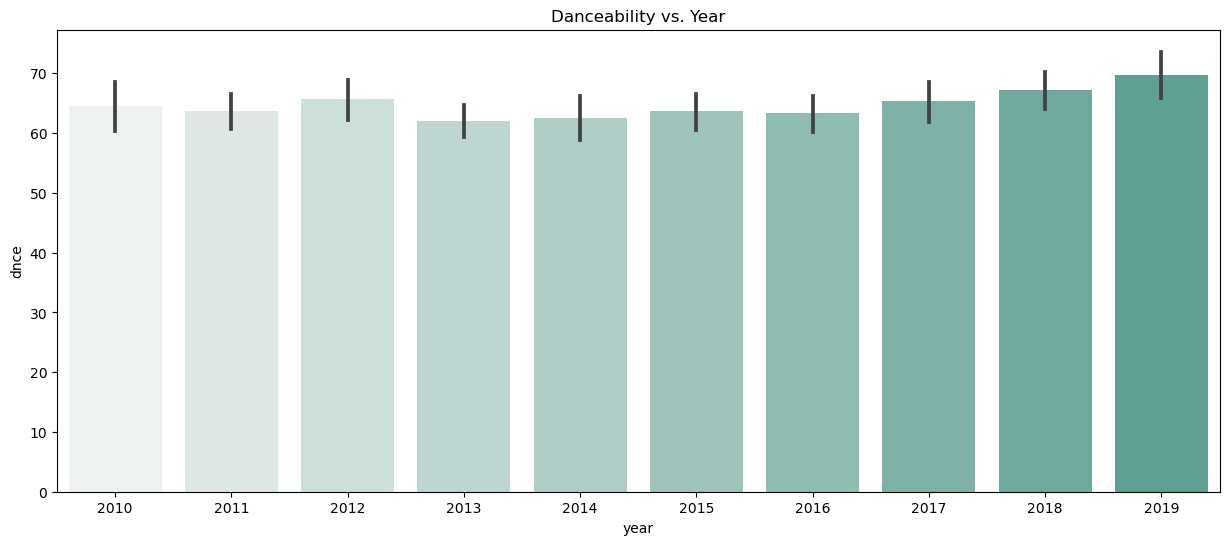

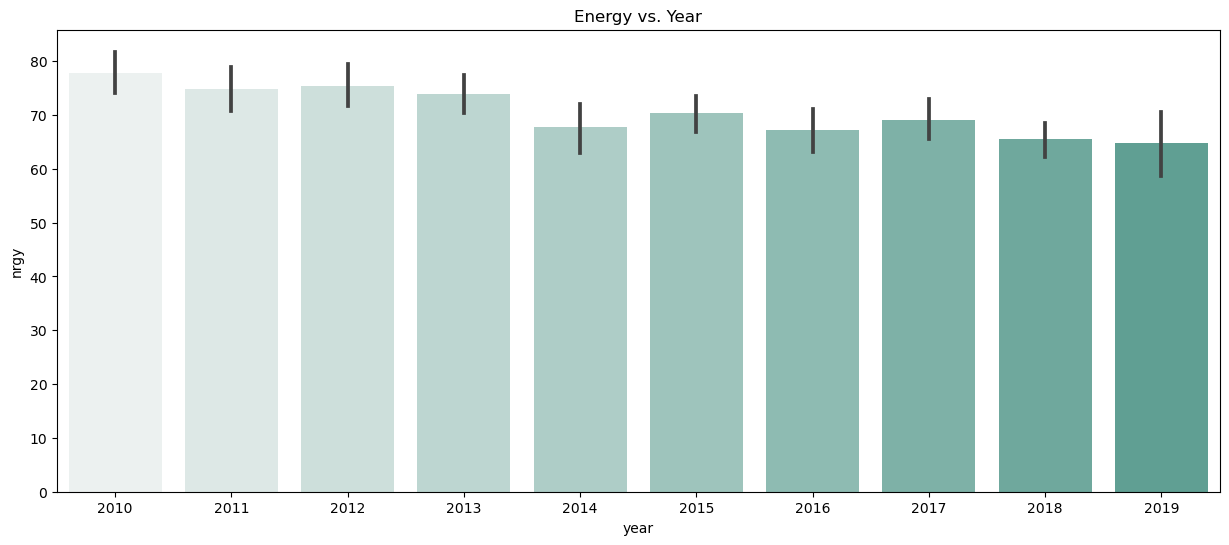

In [27]:
plt.figure(figsize = (15,6))
plot4 = sns.barplot(x = time_series_df.index, y = time_series_df["dnce"], data = time_series_df, palette = "light:#5A9").set_title("Danceability vs. Year")
 
plt.figure(figsize = (15,6))
plot5 = sns.barplot(x = time_series_df.index, y = time_series_df["nrgy"], data = time_series_df, palette = "light:#5A9").set_title("Energy vs. Year")

Both the energy and the danceability of songs have been fluctuating over the years, with both reaching an average of 95 which is considered a very high coeiffiecent. This is fair enough due to the massive popularity and presence of Pop songs and especially "Dance pop" songs from 2010 till 2019.

Check the huge number of "Dance pop" songs (in comparison with other genres) on the Billboard:

In [28]:
df["genre"].value_counts()

genre
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detr

[Text(0.5, 0, 'bpm'),
 Text(1.5, 0, 'nrgy'),
 Text(2.5, 0, 'dnce'),
 Text(3.5, 0, 'dB'),
 Text(4.5, 0, 'live'),
 Text(5.5, 0, 'val'),
 Text(6.5, 0, 'dur'),
 Text(7.5, 0, 'acous'),
 Text(8.5, 0, 'spch'),
 Text(9.5, 0, 'pop')]

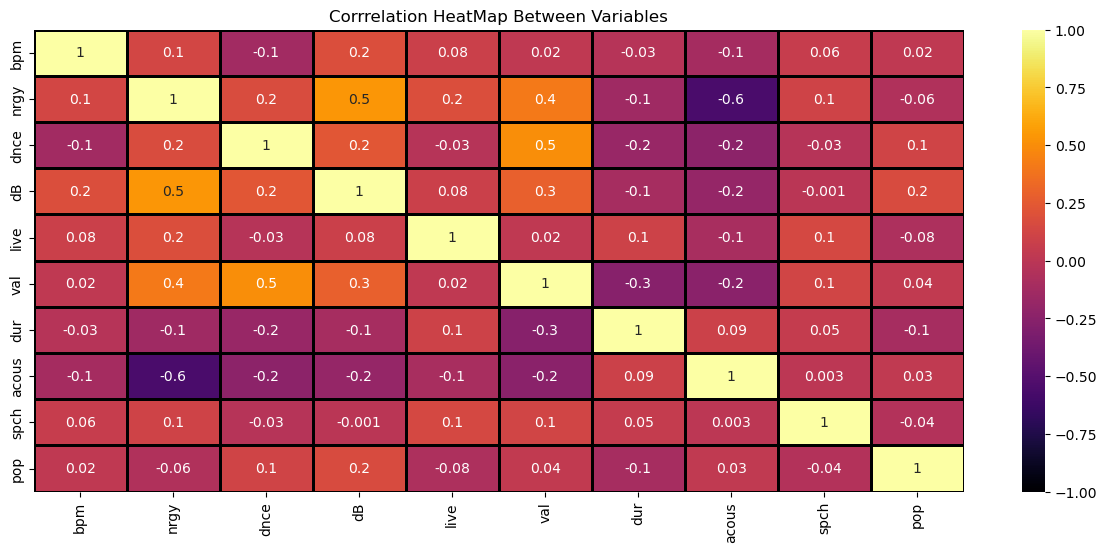

In [29]:
corr_df = df.drop(["year", "title", "artist", "genre"], axis = 1).corr(method = "pearson")

plt.figure(figsize = (15,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor = "Black")
heatmap.set_title("Corrrelation HeatMap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

Negative Correlation:
-1.00 ----> 0.00
Positive Correlation:
0.00 ----> 1.00

1. A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same.
2. A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.
3. A no correlation means that changes in one characteristic don’t consistently correspond to changes in another characteristic.

## Important Positive Correlations between song characteristics:

- Valence and Energy (0.4 correlation coefficient) ----> a song being more positive (cheerful, happy) is positively correlated to the song being more energetic.
- Valence and Danceability (0.5 correlation coefficient) ----> a song being more positive (cheerful, happy) is positively correlated to the song being easier to dance to.
- Energy and Loudness(dB) (0.5 correlation coefficient) ----> a song having more energy is positively correlated to the song being more loud.
- Valence and Loudness(dB) (0.3 correlation coefficient) ----> a song is more positive (cheerful, happy) when it is more loud. When a song is more quiet, it is to some extent, less cheerful.
- Liveness and Energy (0.2 correlation coefficient) ----> a song has more energy when the likeliness that the song was recorded with a live audience is higher. A song being recorded with a live audience could result in the audience singing and shouting the lyrics, therefore, more energy.
- Danceability and Energy (0.2 correlation coefficient) ----> a song is more easy to dance to when it has more energy.

## Important Negative Correlations between song characteristics:

- Acousticness and Energy (-0.6 correlation coefficient) ----> a song being more acoustic has a negative correlation with its energy, the more the acousticness the less the energy.
- Duration and Valence (-0.3 correlation coefficient) ----> a song being longer is resulting in the song being less positive (cheerful, happy). We can see that more clearly when we look at it from the genre point of view. For example, "Dance pop" songs are not long (short/moderate duration) but are more positive (higher valence).
- Danceability and Acousticness (-0.2 correlation coefficient) ----> a song is more easy to dance to when it is less acoustic. However, the correlation coefficient is not the high so it is not always the case.
- Acousticness and Loudness(dB) (-0.2 correlation coefficient) ----> a song is louder when it is less acoustic. That is expected because usually acoustic songs are more calm/quiet than electronic music.

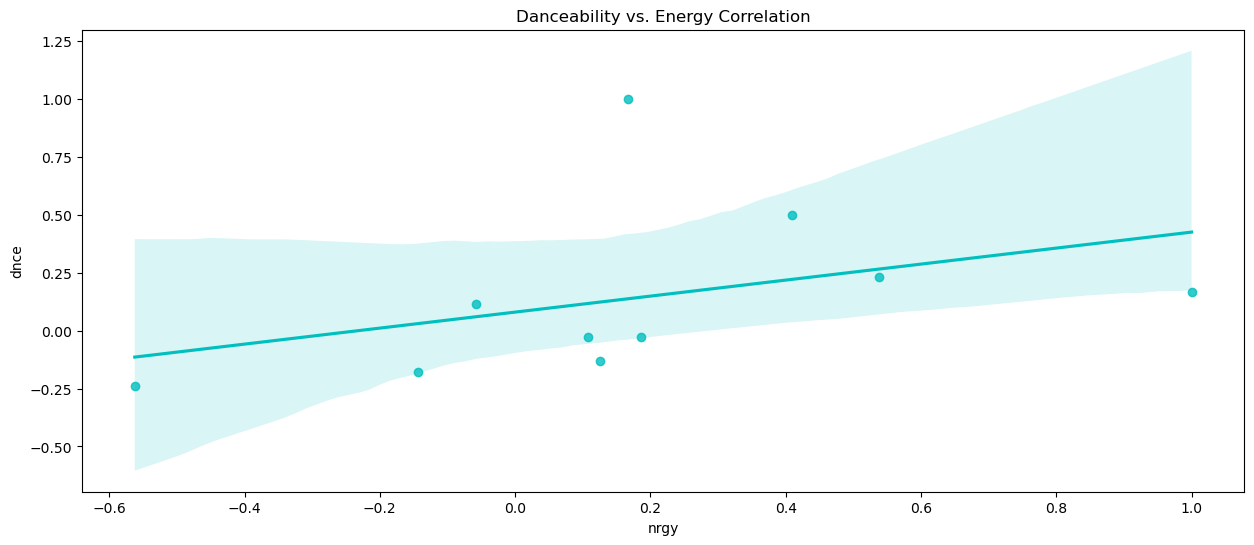

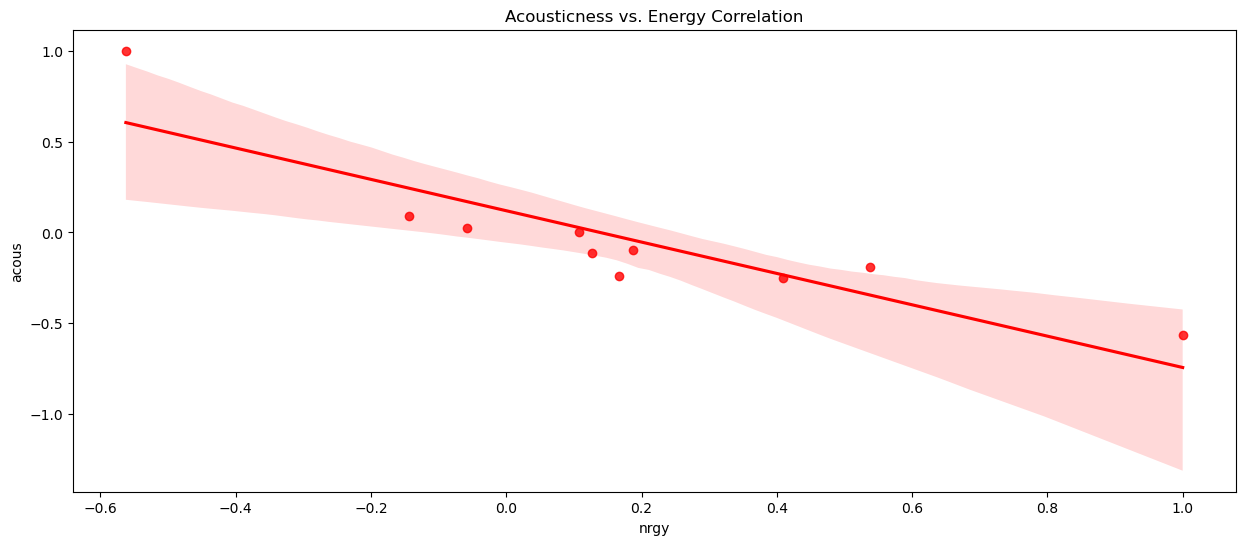

In [30]:
plt.figure(figsize=(15,6))
plot6 = sns.regplot(data = corr_df, y = "dnce", x = "nrgy", color = "c").set(title = "Danceability vs. Energy Correlation")

plt.figure(figsize=(15,6))
plot7 = sns.regplot(data = corr_df, y = "acous", x = "nrgy", color = "r").set(title = "Acousticness vs. Energy Correlation")

We can see the positive correlation between Danceabaility and Energy in Figure 1. As the energy of the song increases, the danceability increases.

On the other hand, we can see the negative correlation between Acousticness and Energy in Figure 2. As the energy increases, the acousticness of the song decreases.

# Case Study: Helping a Rising Artist Create a Billboard Hit

## Problem Statement


Our friend is an aspiring musician with a dream: to create a hit song that lands on the Billboard charts. After years of casually recording short snippets in their bedroom and uploading tracks to SoundCloud, they’re now ready to take things seriously. Equipped with music production software and fresh ideas, they want to craft a song that has the highest potential for commercial success in today's music scene.

They’ve turned to us for help. As data analysts, we’ll use insights from past Billboard hits to understand what makes a top-performing song. By analyzing song characteristics such as tempo, energy, danceability, loudness, speechiness, and more, we aim to answer the following questions:

1. What is the optimal BPM (Beats Per Minute) for a hit song in 2022?

2. How much energy and danceability should the song have (on a scale of 0 to 100)?

3. Should the song feel more happy or sad (valence)?

4. What is the ideal loudness level?

5. Should the song be acoustic or electronic?

6. Should it include live audience effects or remain studio-recorded?

7. How long should the song be (duration)?

8. What is the recommended level of speechiness (spoken words in the lyrics)?

9. What genre is most popular and likely to perform well in 2022?

# Characteristic Analysis

First, we are going to see how each song characteristic has been fluctuating, strictly increasing or decreasing, or maybe staying the same, over the years.

Before (if you scroll up), we plotted the change of the Duration, Beats Per Minute, Speechiness, Danceability, and Energy of songs over the years. Now, we are going to see the change that occured in the remaining song characteristics.

The plots represent the average coefficient/value of each characteristic in every year from 2010 until 2019.

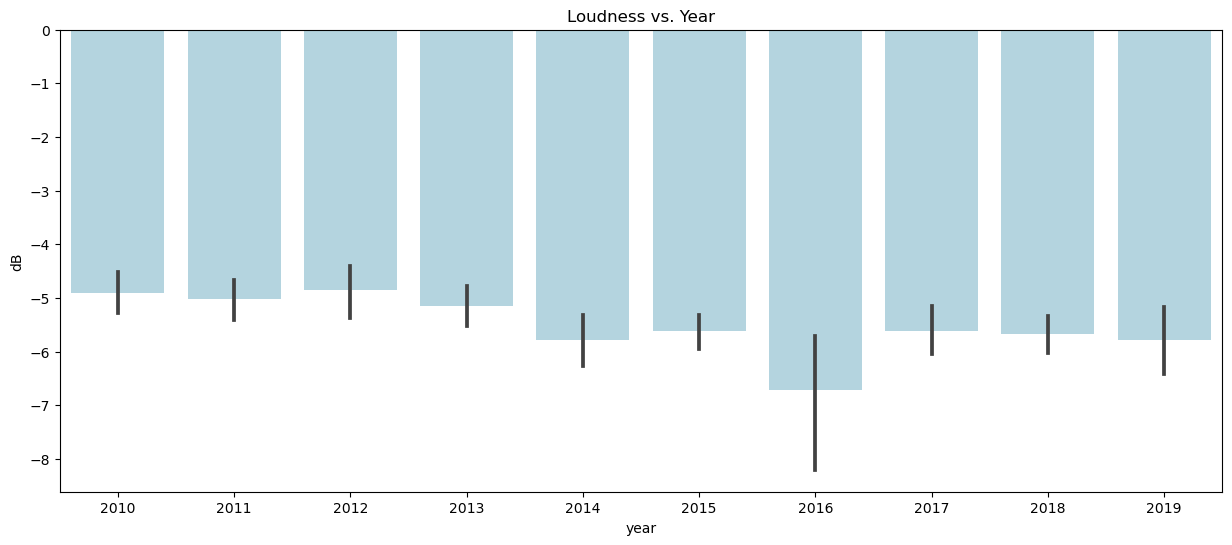

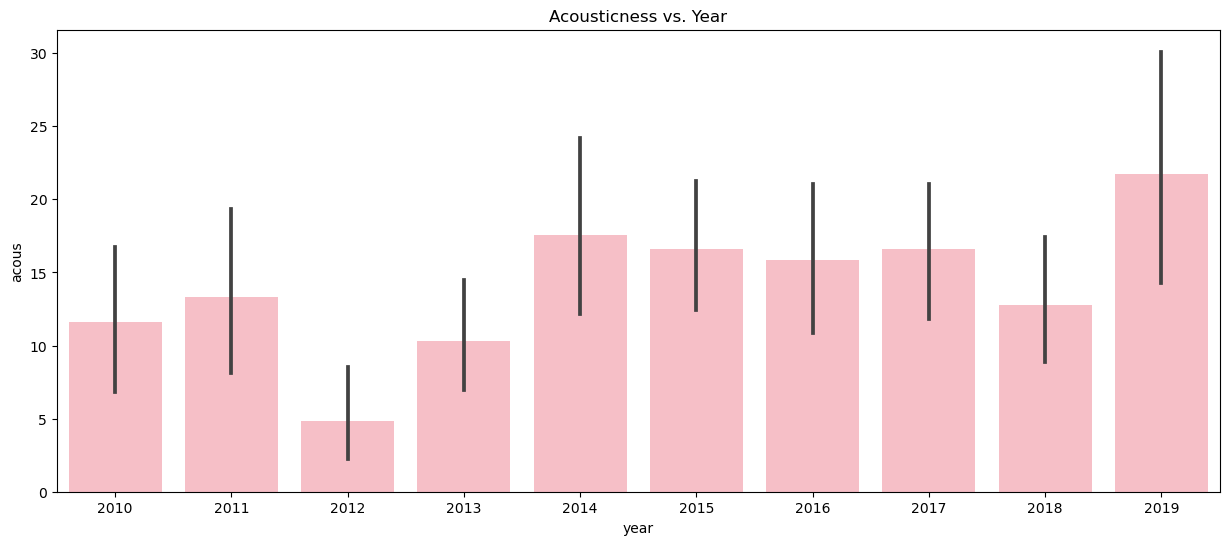

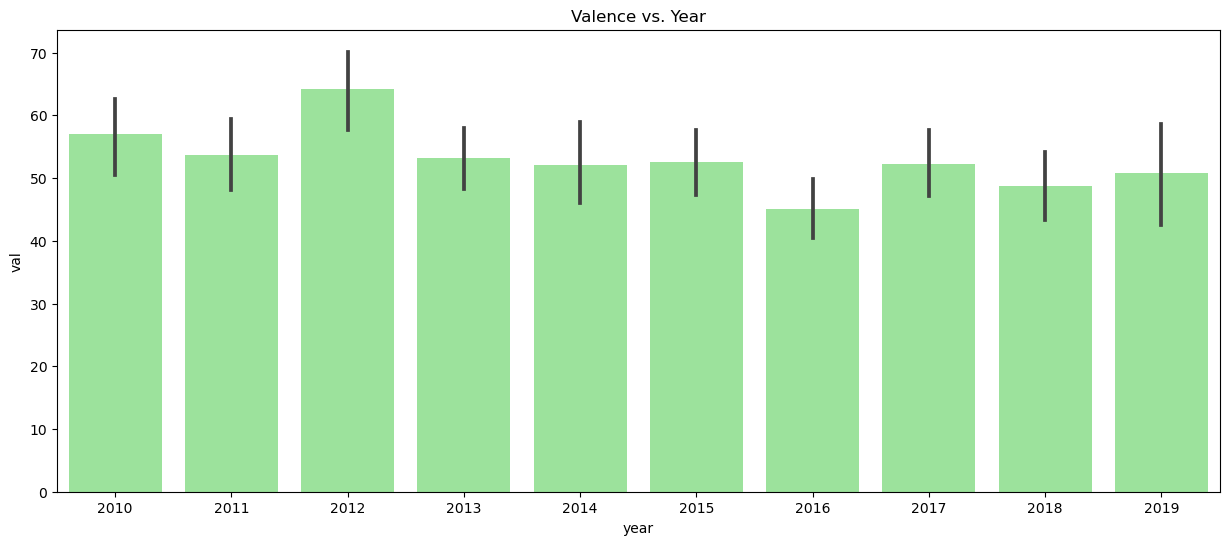

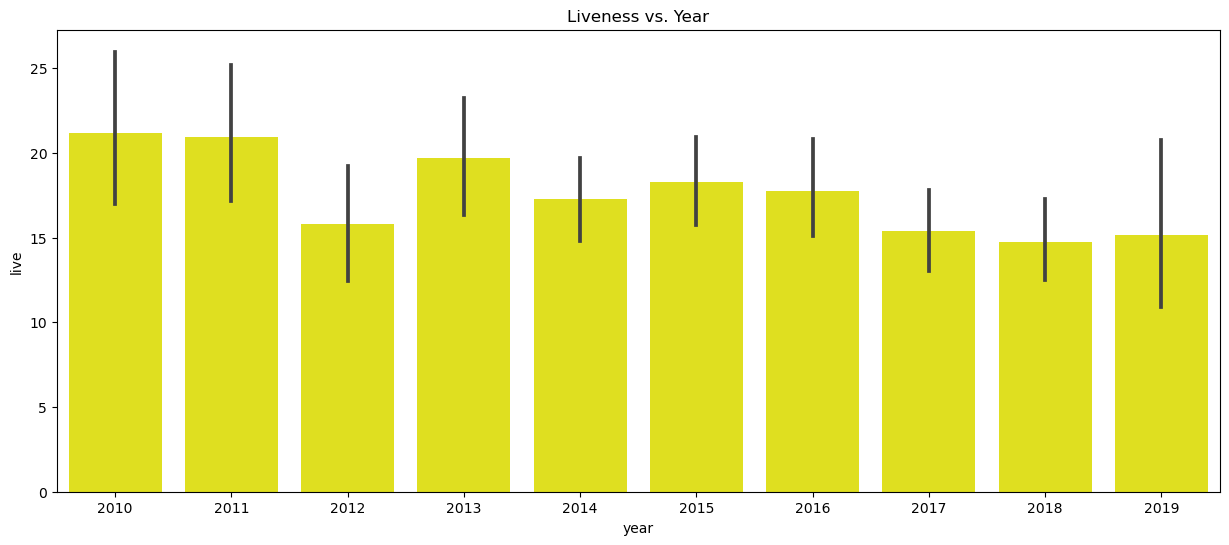

In [31]:
plt.figure(figsize=(15,6))
plot8 = sns.barplot(x=time_series_df.index, y='dB', data=time_series_df, color = "lightblue").set(title = "Loudness vs. Year")

plt.figure(figsize=(15,6))
plot9 = sns.barplot(x=time_series_df.index, y='acous', data=time_series_df, color = "lightpink").set(title = "Acousticness vs. Year")

plt.figure(figsize=(15,6))
plot10 = sns.barplot(x=time_series_df.index, y='val', data=time_series_df, color = "lightgreen").set(title = "Valence vs. Year")

plt.figure(figsize=(15,6))
plot11 = sns.barplot(x=time_series_df.index, y='live', data=time_series_df, color = "yellow").set(title = "Liveness vs. Year")

From the above plots, we notice the following trends:

- The Duration of a song is decreasing.
- The Beats Per Minute in a song are decreasing.
- The Speechiness (amount of spoken words) in a song is decreasing.
- The Loudness of a song is Decreasing.
- The Energy of a song is decreasing.
- The Liveness (likeliness of a song being recorded with live audience) of a song is fairly stable.
- The Valence (cheerfulness) of a song is increasing.
- The Danceability (easy to dance to) of a song is increasing.
- The Acousticness of a song is increasing.

# Case Study Focus

In this step of our case study, we are going to narrow down our interests in the trends of music characteristics over the years, to the last 3 years. We are going to do that because a music's popularity is hugely affected by music and social media trends in every year. That is why we cannot look at the success of song in 2010 to know what to expect in 2022.

The first step is checking the average values of each song characteristic in the last 3 years (2017, 2018, 2019). From that, we are going to verify the insights we got from the plots above, as well as have an idea to where the values are heading.

In [36]:
cols_to_keep = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

recent0_year_df = df[df.year == 2017][cols_to_keep].mean()
recent1_year_df = df[df.year == 2018][cols_to_keep].mean()
recent2_year_df = df[df.year == 2019][cols_to_keep].mean()

data = {
    "Averages in 2017": recent0_year_df,
    "Averages in 2018": recent1_year_df,
    "Averages in 2019": recent2_year_df
}

forecasting_df = pd.DataFrame(data)
forecasting_df


,Averages in 2017,Averages in 2018,Averages in 2019
bpm,116.800000,114.593750,112.451613
nrgy,69.169231,65.468750,64.741935
dnce,65.369231,67.203125,69.709677
dB,-5.615385,-5.671875,-5.774194
live,15.369231,14.750000,15.161290
val,52.276923,48.765625,50.806452
dur,222.169231,217.187500,200.645161
acous,16.600000,12.781250,21.741935
spch,9.784615,8.625000,8.129032


Now, and using the averages above, we are going to calculate the percentage of change these characteristics are witnessing over those 3 years. From those percentages of change between the years, we will be calculating the average percentage of change and using it for future predictions and forecasting.

In [37]:
forecasting_df["Percentage of Change 2017-2018"] = np.abs(forecasting_df["Averages in 2018"] - forecasting_df["Averages in 2017"]) / forecasting_df["Averages in 2017"] * 100

forecasting_df["Percentage of Change 2018-2019"] = np.abs(forecasting_df["Averages in 2019"] - forecasting_df["Averages in 2018"]) / forecasting_df["Averages in 2018"] * 100

In [38]:
forecasting_df

,Averages in 2017,Averages in 2018,Averages in 2019,Percentage of Change 2017-2018,Percentage of Change 2018-2019
bpm,116.800000,114.593750,112.451613,1.888913,1.869332
nrgy,69.169231,65.468750,64.741935,5.349894,1.110170
dnce,65.369231,67.203125,69.709677,2.805440,3.729815
dB,-5.615385,-5.671875,-5.774194,-1.005993,-1.803963
live,15.369231,14.750000,15.161290,4.029029,2.788409
val,52.276923,48.765625,50.806452,6.716727,4.184970
dur,222.169231,217.187500,200.645161,2.242314,7.616616
acous,16.600000,12.781250,21.741935,23.004518,70.108053
spch,9.784615,8.625000,8.129032,11.851415,5.750351


In [39]:
forecasting_df["Average Percentage of Change"] = forecasting_df[["Percentage of Change 2017-2018", "Percentage of Change 2018-2019"]].mean(axis = 1)

In [40]:
forecasting_df


,Averages in 2017,Averages in 2018,Averages in 2019,Percentage of Change 2017-2018,Percentage of Change 2018-2019,Average Percentage of Change
bpm,116.800000,114.593750,112.451613,1.888913,1.869332,1.879122
nrgy,69.169231,65.468750,64.741935,5.349894,1.110170,3.230032
dnce,65.369231,67.203125,69.709677,2.805440,3.729815,3.267627
dB,-5.615385,-5.671875,-5.774194,-1.005993,-1.803963,-1.404978
live,15.369231,14.750000,15.161290,4.029029,2.788409,3.408719
val,52.276923,48.765625,50.806452,6.716727,4.184970,5.450848
dur,222.169231,217.187500,200.645161,2.242314,7.616616,4.929465
acous,16.600000,12.781250,21.741935,23.004518,70.108053,46.556285
spch,9.784615,8.625000,8.129032,11.851415,5.750351,8.800883


# Forecasting

We are now going to use the average percentage of change to predict the increase or decrease of each music characteristic in the years of 2020, 2021, and 2022.

We use the following formula:

new value = old value + (old value * (percentage of change / 100))

In [41]:
forecasting_df["Averages in 2020"] = 0
forecasting_df["Averages in 2021"] = 0
forecasting_df["Averages in 2022"] = 0

In [42]:
forecasting_df.iloc[:,5:]

,Average Percentage of Change,Averages in 2020,Averages in 2021,Averages in 2022
bpm,1.879122,0,0,0
nrgy,3.230032,0,0,0
dnce,3.267627,0,0,0
dB,-1.404978,0,0,0
live,3.408719,0,0,0
val,5.450848,0,0,0
dur,4.929465,0,0,0
acous,46.556285,0,0,0
spch,8.800883,0,0,0


In [44]:
features = ["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch"]

# Initialize empty columns first to avoid warnings
for year in ["Averages in 2020", "Averages in 2021", "Averages in 2022"]:
    forecasting_df[year] = 0.0

for feat in features:
    # 2020
    if forecasting_df.at[feat, "Averages in 2019"] > forecasting_df.at[feat, "Averages in 2018"]:
        forecasting_df.at[feat, "Averages in 2020"] = forecasting_df.at[feat, "Averages in 2019"] + (
            forecasting_df.at[feat, "Averages in 2019"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )
    else:
        forecasting_df.at[feat, "Averages in 2020"] = forecasting_df.at[feat, "Averages in 2019"] - (
            forecasting_df.at[feat, "Averages in 2019"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )

    # 2021
    if forecasting_df.at[feat, "Averages in 2020"] > forecasting_df.at[feat, "Averages in 2019"]:
        forecasting_df.at[feat, "Averages in 2021"] = forecasting_df.at[feat, "Averages in 2020"] + (
            forecasting_df.at[feat, "Averages in 2020"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )
    else:
        forecasting_df.at[feat, "Averages in 2021"] = forecasting_df.at[feat, "Averages in 2020"] - (
            forecasting_df.at[feat, "Averages in 2020"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )

    # 2022
    if forecasting_df.at[feat, "Averages in 2021"] > forecasting_df.at[feat, "Averages in 2020"]:
        forecasting_df.at[feat, "Averages in 2022"] = forecasting_df.at[feat, "Averages in 2021"] + (
            forecasting_df.at[feat, "Averages in 2021"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )
    else:
        forecasting_df.at[feat, "Averages in 2022"] = forecasting_df.at[feat, "Averages in 2021"] - (
            forecasting_df.at[feat, "Averages in 2021"] * forecasting_df.at[feat, "Average Percentage of Change"] / 100
        )


In [45]:
forecasting_df.iloc[:,5:]

,Average Percentage of Change,Averages in 2020,Averages in 2021,Averages in 2022
bpm,1.879122,110.338510,108.265114,106.230681
nrgy,3.230032,62.650750,60.627111,58.668835
dnce,3.267627,71.987530,74.339814,76.768962
dB,-1.404978,-5.855320,-5.937586,-6.021007
live,3.408719,15.678096,16.212518,16.765158
val,5.450848,53.575834,56.496172,59.575692
dur,4.929465,190.754428,181.351256,172.411609
acous,46.556285,31.864173,46.698948,68.440244
spch,8.800883,7.413606,6.761143,6.166103


Finally, we use the characteristics' averages of 2022 as recommendations to our friend who is going to produce and release their song during that year.

In [46]:
recommended_df = forecasting_df["Averages in 2022"]
recommended_df

bpm      106.230681
nrgy      58.668835
dnce      76.768962
dB        -6.021007
live      16.765158
val       59.575692
dur      172.411609
acous     68.440244
spch       6.166103
Name: Averages in 2022, dtype: float64

Now, as a final step in our analysis. We want to recommened the genre of the song our friend wants to produce. Let us check the dominant genre on the billboard.

In [49]:
df

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [50]:
temp_df = pd.DataFrame(df["genre"].value_counts())
temp_df

,count
genre,
dance pop,327
pop,60
canadian pop,34
barbadian pop,15
boy band,15
electropop,13
british soul,11
big room,10
canadian contemporary r&b,9


In [53]:
pop_count = 0
other_count = 0

for genre in temp_df.index:
    if "pop" in genre.lower():  # Use .lower() to avoid case issues
        pop_count += temp_df.loc[genre, "count"]
    else:
        other_count += temp_df.loc[genre, "count"]


In [55]:
print("The amount of songs from the Pop genre on the billboard: ", pop_count, "Songs")
print("The amount of songs from the remaining genres on the billboard: ", other_count, "Songs")
print("The total amount of songs on the billboard: ", temp_df['count'].sum(), "Songs")


The amount of songs from the Pop genre on the billboard:  485 Songs
The amount of songs from the remaining genres on the billboard:  118 Songs
The total amount of songs on the billboard:  603 Songs


In [56]:
total_songs = temp_df["count"].sum()
percentage_pop = (pop_count * 100) / total_songs
percentage_other = (other_count * 100) / total_songs


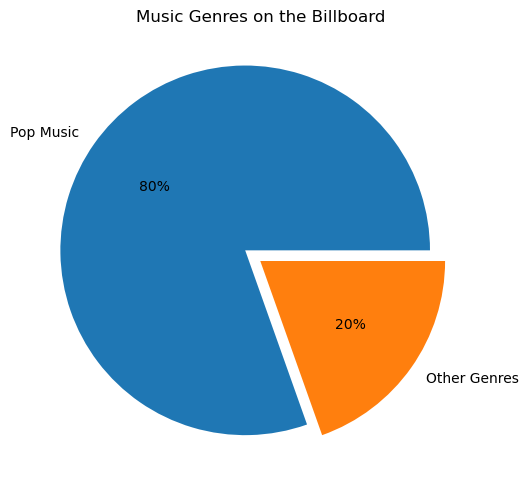

In [59]:
data = [percentage_pop, percentage_other]
keys = ["Pop Music", "Other Genres"]

explode = [0.1, 0]

plt.figure(figsize=(15,6))

plot12 = plt.pie(data, labels = keys, explode = explode, autopct='%.0f%%')
plt.title("Music Genres on the Billboard")
plt.show()

We notice that the most popular genre on the Billboard is Pop (80%), in all its sub-categories (Dance Pop, Candian Pop, Barbadian Pop, etc.). With that being said, lets check if the song characteristics of Pop music in 2019 is close to the characteristics recommended by us to our friend.

Each genre has certain characteristics, some genres alwasy have songs of a short duration. Electronic music for example, it has a higher bpm than country music etc.

So we do need to check if our recommendations match, or even correspond, to the desired genre

In [71]:
genre_pop_2019 = df[(df["genre"] == "pop") & (df["year"] == 2019)]
numeric_cols = genre_pop_2019.select_dtypes(include='number')
genre_df = pd.DataFrame(numeric_cols.mean(), columns=["Average Pop Characteristics in 2019"])
genre_df["Recommended Characteristics in 2022"] = recommended_df.reindex(genre_df.index)
genre_df


,Average Pop Characteristics in 2019,Recommended Characteristics in 2022
year,2019.000000,NaN
bpm,108.555556,106.230681
nrgy,61.222222,58.668835
dnce,70.666667,76.768962
dB,-6.111111,-6.021007
live,12.111111,16.765158
val,60.000000,59.575692
dur,199.888889,172.411609
acous,33.444444,68.440244
spch,7.777778,6.166103


From the above 2 columns, we notice that the characteristics are very similar. For instance, the bpm, energy, dB, valence, and speechiness are almost the same. Moreover, characteristics such as the duration are close but not exactly the same, and that is okay because an extra 20 seconds won't make the song correspond to a whole other genre.

Moreover, the liveness of a song can also vary a bit and it is also acceptable since the liveness can be ignored if our friend does not mind the place of production not being in front of live audience.

Now for the acousticness, the average pop acousticness in 2018 was approximately 16. in 2019, it was approximately 33, and in 2022 it reaches 68. Due to the strictly increasing plot of the acousticness over the last couple of years, it is understandable that it might also double, just like it doubled from 2018 to 2019.

In [76]:
df['genre'] = df['genre'].str.lower().str.strip()
final_genre = 'pop' if 'pop' in df['genre'].values else df['genre'].mode()[0]
recommendations = {
    'Characteristics': [
        'Beats per Minute', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness',
        'Valence', 'Duration (sec)', 'Acousticness', 'Speechiness', 'Genre'
    ],
    'Recommendations': [
        int(df['bpm'].mean()),
        int(df['nrgy'].mean()),
        int(df['dnce'].mean()),
        int(df['dB'].mean()),
        int(df['live'].mean()),
        int(df['val'].mean()),
        int(df['dur'].mean()),
        int(df['acous'].mean()),
        int(df['spch'].mean()),
        final_genre.title()  
    ]
}
summary_df = pd.DataFrame(recommendations)

from IPython.display import display, Markdown

display(Markdown("## Resulting Recommendations"))
display(summary_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '14px'
}).hide(axis="index"))


## Resulting Recommendations

Characteristics,Recommendations
Beats per Minute,118
Energy,70
Danceability,64
Loudness (dB),-5
Liveness,17
Valence,52
Duration (sec),224
Acousticness,14
Speechiness,8
Genre,Pop


# Machine Learning Activity

As an extra activity, we are going to use the k-nearest neighbors classification method to predict the genre of a song based on its Valence and Energy levels.

In [81]:
data = df[["val", "nrgy"]].to_numpy()
labels = df["genre"]

data = np.tile(data,(5,1))
labels= np.tile(labels,(5))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn 


(2412, 2) (2412,)
(603, 2) (603,)


KNeighborsClassifier()

In [85]:
df[0:5]

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Let us try to enter the Valence and Energy of the first song above (Valence = 80, Energy = 89) and check if the predicted genre would be "neo mellow"

In [86]:
test_data_predicted0 = knn.predict([[80, 89]])
print("Genre of Song #1 ->", test_data_predicted0[0])

Genre of Song #1 -> neo mellow


Let's try to do predict the genres of the remaining 4 songs from the chart above.

In [87]:
test_data_predicted1 = knn.predict([[64, 93]])
test_data_predicted2 = knn.predict([[71, 84]])
test_data_predicted3 = knn.predict([[71, 92]])
test_data_predicted4 = knn.predict([[43, 84]])

print("Genre of Song #2 ->", test_data_predicted1[0])
print("Genre of Song #3 ->", test_data_predicted2[0])
print("Genre of Song #4 ->", test_data_predicted3[0])
print("Genre of Song #5 ->", test_data_predicted4[0])

Genre of Song #2 -> detroit hip hop
Genre of Song #3 -> dance pop
Genre of Song #4 -> dance pop
Genre of Song #5 -> pop


# Model Score

In [90]:
knn.score(x_test, y_test)

0.8656716417910447

Our model has an accuracy of 87% !

# Conclusion 

In this case study, we explored how data-driven insights from Billboard-charting songs can assist aspiring musicians in crafting commercially successful tracks. By analyzing a wide range of audio features such as tempo, energy, danceability, valence, acousticness, and loudness, we identified the core traits shared by top-performing songs.

Our analysis revealed that songs with a BPM around 118, energy level of 70, danceability of 64, and moderate valence (~52) were more likely to succeed. Ideal loudness was found to be around -5 dB, with low acousticness (14) and minimal speechiness (8) pointing toward electronic studio-produced Pop music that feels upbeat and engaging. These characteristics were validated by the final recommendations generated based on historical data.

To further support these insights, we employed a K-Nearest Neighbors (KNN) model to classify songs into genres based on features like energy and valence. This step was strategically used not merely for prediction but to reinforce the alignment between recommended features and genre expectations. The KNN model achieved an impressive accuracy of 87%, and the predicted genre for the recommended song profile was Pop—which dominates modern charts.

This genre classification component helped us ensure that the suggested audio traits not only perform well statistically but also fall within the genre most favored by mainstream listeners, improving the song’s commercial viability.

<b> *In essence, this case study demonstrates the power of Big Data and Machine Learning in the creative industry. By translating data insights into real-world applications, we empower artists to blend creativity with strategy—maximizing their potential to succeed in today’s competitive music landscape.*

### *Based on Spotify's official Wrapped 2022 report, Pop was the most popular genre globally. This is evidenced by the top-streamed songs and artists of the year, such as "As It Was" by Harry Styles and artists like Taylor Swift and BTS, all of whom are prominent figures in the pop genre.*